## Acquiring data

Read the csv file from the given link 

    train_url = "https://github.com/PhilChodrow/PIC16b/blob/master/datasets/fake_news_train.csv?raw=true"

In [1]:
#importing all packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, Dropout, Input, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import string
import re

In [2]:
#importing data
train_url = "https://github.com/PhilChodrow/PIC16b/blob/master/datasets/fake_news_train.csv?raw=true"
train_data = pd.read_csv(train_url)
train_data

,Unnamed: 0,title,text,fake
0,17366,Merkel: Strong result for Austria's FPO 'big c...,German Chancellor Angela Merkel said on Monday...,0
1,5634,Trump says Pence will lead voter fraud panel,"WEST PALM BEACH, Fla.President Donald Trump sa...",0
2,17487,JUST IN: SUSPECTED LEAKER and “Close Confidant...,"On December 5, 2017, Circa s Sara Carter warne...",1
3,12217,Thyssenkrupp has offered help to Argentina ove...,"Germany s Thyssenkrupp, has offered assistance...",0
4,5535,Trump say appeals court decision on travel ban...,President Donald Trump on Thursday called the ...,0
...,...,...,...,...
22444,10709,ALARMING: NSA Refuses to Release Clinton-Lynch...,If Clinton and Lynch just talked about grandki...,1
22445,8731,Can Pence's vow not to sling mud survive a Tru...,"() - In 1990, during a close and bitter congre...",0
22446,4733,Watch Trump Campaign Try To Spin Their Way Ou...,A new ad by the Hillary Clinton SuperPac Prior...,1
22447,3993,"Trump celebrates first 100 days as president, ...","HARRISBURG, Pa.U.S. President Donald Trump hit...",0


## Make Datasets

Write a function called `make_dataset`. This function should do four things:

1. Change the text to lowercase.

2. Remove stopwords from the article text and title. A stopword is a word that is usually considered to be uninformative, such as “the,” “and,” or “but.” You may find this StackOverFlow thread to be helpful.

3. Construct and return a tf.data.Dataset with two inputs and one output. The input should be of the form (title, text), and the output should consist only of the fake column. You may find it helpful to consult lecture notes or this tutorial for reference on how to construct and use Datasets with multiple inputs.

Helpful resources:
1. Lower case: https://saturncloud.io/blog/how-to-lowercase-a-pandas-dataframe-string-column-if-it-has-missing-values/

2. Remove stopwords: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe. You need to install nltk library. If you do not want to install it, you can use Google colab.

3. Tensorflow dataset with multiple inputs and set batch: https://stackoverflow.com/questions/52582275/tf-data-with-multiple-inputs-outputs-in-keras.

In [3]:
# download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words())

[nltk_data] Downloading package stopwords to /Users/T/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Function to preprocess text
def preprocess_text(text):
    """
    Function that converts text to lower case and split the words to remove stopwords
    
    Args:
    - text (string): input words for processing

    Return: 
    - text (string): processed words after removing stop words
    """
    text = str(text).lower()
    text_split = text.split()
    #remove words in the stop_words list
    text_split = [word for word in text_split if word not in stop_words]
    
    return ' '.join(text_split)

In [5]:
#apply preprocessing to the data set
train_data['title'] = train_data['title'].apply(preprocess_text)
train_data['text'] = train_data['text'].apply(preprocess_text)

## Train test split:

Write a function `train_test_split` to do train test split for any tensorflow dataset. The passing arguement should be the training size.


Then, you should use your function to do train_test split and the trainning size is 80% of your dataset. 

In [6]:
#function to create tensorflow data set
def make_dataset(df):
    """
    Creates a TensorFlow dataset from DataFrame containing news articles

    Args:
    - df (pd DataFrame): DataFrame containing text data

    Returns:
    - tf.data.Dataset: TensorFlow dataset containing data in ((title, text), label) format
    """
    titles, texts, labels = df['title'].values, df['text'].values, df['fake'].values

    dataset = tf.data.Dataset.from_tensor_slices(((titles, texts), labels))
    return dataset

#create dataset
train_data_tf = make_dataset(train_data)

#put data into batches
train_data_tf = train_data_tf.batch(32)

# Function to split the dataset
def train_test_split(dataset, train_size):
    """
    Splits dataset into training and testing

    Args:
    - dataset (tf.data.Dataset): The input dataset to be split
    - train_size (float): The proportion of the data in the training set

    Returns:
    - tuple: A tuple containing (train_dataset (tf.data.Dataset),test_dataset (tf.data.Dataset)
    """
    # Count number of training samples
    dataset_size = len(list(dataset))
    train_size = int(train_size * dataset_size)

    # Shuffle the dataset
    dataset = dataset.shuffle(buffer_size=dataset_size)

    # Split the dataset into train and test
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)

    return train_dataset, test_dataset

In [7]:
# Apply the function to split the data
train_dataset, test_dataset = train_test_split(train_data_tf, 0.8)

2024-05-26 15:32:27.562311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Text vectorization

Here is one option:

    #preparing a text vectorization layer for tf model
    size_vocabulary = 2000

    def standardization(input_data):
        lowercase = tf.strings.lower(input_data)
        no_punctuation = tf.strings.regex_replace(lowercase,
                                  '[%s]' % re.escape(string.punctuation),'')
        return no_punctuation 

    title_vectorize_layer = TextVectorization(
        standardize=standardization,
        max_tokens=size_vocabulary, # only consider this many words
        output_mode='int',
        output_sequence_length=500) 

    title_vectorize_layer.adapt(train.map(lambda x, y: x["title"]))
    
You can also use your preferred vectorization, e.g. text vectorization. You are also welcome to change the parameters such as `size_vocabulary` and `output_sequence_length`. 



In [8]:
#prepare text vectorization layer for tf model
max_tokens = 2000
embed_dim = 100
sequence_length = 800

#standarization function
def standardization(input_data):
    """
    Standardize input data

    Args:
    - dataset (tf.data.Dataset): The input dataset to be standarized

    Returns:
    - dataset (tf.data.Dataset): dataset after removing punctuation and changed to lower case
    """
    # removing capitals
    lowercase = tf.strings.lower(input_data)
    # Removing punctuation
    no_punctuation = tf.strings.regex_replace(lowercase, '[%s]' % re.escape(string.punctuation), '')
    return no_punctuation 

#title vectorize layer
title_vectorize_layer = TextVectorization(
    standardize=standardization,
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=sequence_length)

#text vectorize layer
text_vectorize_layer = TextVectorization(
    standardize=standardization,
    max_tokens=max_tokens,
    output_mode='int',
    output_sequence_length=sequence_length)

# Adapt vectorization layers
title_vectorize_layer.adapt(train_dataset.map(lambda x, y: x[0]))
text_vectorize_layer.adapt(train_dataset.map(lambda x, y: x[1]))

2024-05-26 15:32:28.111452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-26 15:32:29.180764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Create Models

Please use Keras models to offer a perspective on the following question:

`When detecting fake news, is it most effective to focus on only the title of the article, the full text of the article, or both?`
To address this question, create three (3) Keras models.

In the first model, you should use only the article title as an input.

In the second model, you should use only the article text as an input.

In the third model, you should use both the article title and the article text as input.

Train your models on the training data until they appear to be “fully” trained. Assess and compare their performance. Make sure to include a visualization of the training histories.


## Notes:

1. For the first two models, you don’t have to create new Datasets. Instead, just specify the inputs to the keras.Model appropriately, and Keras will automatically ignore the unused inputs in the Dataset.

2. The lecture notes and tutorials linked above are likely to be helpful as you are creating your models as well.

3. You will need to use the Functional API, rather than the Sequential API, for this modeling task.

4. When using the Functional API, it is possible to use the same layer in multiple parts of your model; see this [tutorial](https://keras.io/guides/functional_api/) for examples. I recommended that you share a text vectorization layer and an embedding layer for both the article title and text inputs.
    
    Note: Do not use the shared embedding layer with separate text vectorization layers. If you do so, you will be embedding two different words on the same coordinate.

5. You may encounter overfitting, in which case Dropout layers can help.

You’re free to be creative when designing your models. If you’re feeling very stuck, start with some of the pipelines for processing text that we’ve seen in lecture, and iterate from there. Please include in your discussion some of the things that you tried and how you determined the models you used.

In [9]:
#Model 1: only the title
title_vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_mode='int')
title_vectorize_layer.adapt(train_dataset.map(lambda x, y: x[0]))

# Create and compile the model
model_title = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string),
    title_vectorize_layer,
    layers.Embedding(max_tokens, output_dim=3), 
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(), 
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model_title.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the model
title_only = model_title.fit(train_dataset.map(lambda x, y: (x[0], y)), epochs=20, validation_data=test_dataset.map(lambda x, y: (x[0], y)))


Cause: could not parse the source code of <function <lambda> at 0x310ff0540>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: (x[0], y)

Match 1:
lambda x, y: (x[0], y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x310ff0540>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: (x[0], y)

Match 1:
lambda x, y: (x[0], y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x310ff0c20>: found multiple definitions with identical sign

2024-05-26 15:32:29.783007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.6676 - loss: 0.6670 - val_accuracy: 0.7773 - val_loss: 0.5575
Epoch 2/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7655 - loss: 0.5352 - val_accuracy: 0.7963 - val_loss: 0.4758
Epoch 3/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8008 - loss: 0.4597 - val_accuracy: 0.8592 - val_loss: 0.3837
Epoch 4/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8345 - loss: 0.4036 - val_accuracy: 0.8814 - val_loss: 0.3259
Epoch 5/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8706 - loss: 0.3414 - val_accuracy: 0.8996 - val_loss: 0.2914
Epoch 6/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8887 - loss: 0.3070 - val_accuracy: 0.9122 - val_loss: 0.2568
Epoch 7/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9038 - loss: 0.2725 - val_accuracy: 0.9215 - val_loss: 0.2301
Epoch 8/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9142 - loss: 0.2463 - val_accurac

In [10]:
#Model 2: only the text
text_vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_mode='int')
text_vectorize_layer.adapt(train_dataset.map(lambda x, y: x[1]))

# Create and compile the model
model_text = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string),
    text_vectorize_layer,
    layers.Embedding(max_tokens, output_dim=3), 
    layers.Dropout(0.5),
    layers.GlobalAveragePooling1D(), 
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

#complie the model
model_text.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
text_only = model_text.fit(train_dataset.map(lambda x, y: (x[1], y)), epochs=20, validation_data=test_dataset.map(lambda x, y: (x[1], y)))

Cause: could not parse the source code of <function <lambda> at 0x311961da0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: (x[1], y)

Match 1:
lambda x, y: (x[1], y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x311961da0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: (x[1], y)

Match 1:
lambda x, y: (x[1], y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x3119627a0>: found multiple definitions with identical sign

2024-05-26 15:32:37.002911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5100 - loss: 0.6911 - val_accuracy: 0.6432 - val_loss: 0.6814
Epoch 2/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5881 - loss: 0.6750 - val_accuracy: 0.6239 - val_loss: 0.6417
Epoch 3/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7108 - loss: 0.6320 - val_accuracy: 0.8546 - val_loss: 0.5824
Epoch 4/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7727 - loss: 0.5701 - val_accuracy: 0.9202 - val_loss: 0.5081
Epoch 5/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.5169 - val_accuracy: 0.9087 - val_loss: 0.4563
Epoch 6/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8253 - loss: 0.4715 - val_accuracy: 0.9018 - val_loss: 0.4008
Epoch 7/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8437 - loss: 0.4338 - val_accuracy: 0.8932 - val_loss: 0.3810
Epoch 8/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.4114 - val_accuracy: 0.9122 - val_

In [11]:
# Model 3: both title and text
# adapt the text and title vectorization layers
title_vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_mode='int')
text_vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_mode='int')

title_vectorize_layer.adapt(train_dataset.map(lambda x, y: x[0]))
text_vectorize_layer.adapt(train_dataset.map(lambda x, y: x[1]))

# Create and compile the combined model
title_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='title')
text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')

title_vector = title_vectorize_layer(title_input)
text_vector = text_vectorize_layer(text_input)

title_embed = layers.Embedding(max_tokens, output_dim=3)(title_vector)
text_embed = layers.Embedding(max_tokens, output_dim=3)(text_vector)

title_pool = layers.GlobalAveragePooling1D()(title_embed)
text_pool = layers.GlobalAveragePooling1D()(text_embed)

#concatenate the layers
concatenated = layers.concatenate([title_pool, text_pool])
dropout = layers.Dropout(0.5)(concatenated)
output = layers.Dense(1, activation='sigmoid')(dropout)

model_both = tf.keras.Model(inputs=[title_input, text_input], 
                            outputs=output)

#compile the models
model_both.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the combined model
text_title = model_both.fit(
    train_dataset.map(lambda x, y: ((x[0], x[1]), y)), 
    epochs=20, 
    validation_data=test_dataset.map(lambda x, y: ((x[0], x[1]), y))
)


2024-05-26 15:33:05.885733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/20


2024-05-26 15:33:07.028898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6319 - loss: 0.6577 - val_accuracy: 0.8019 - val_loss: 0.5364
Epoch 2/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7686 - loss: 0.5298 - val_accuracy: 0.8564 - val_loss: 0.4287
Epoch 3/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8338 - loss: 0.4366 - val_accuracy: 0.8941 - val_loss: 0.3376
Epoch 4/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3608 - val_accuracy: 0.9238 - val_loss: 0.2730
Epoch 5/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - loss: 0.3022 - val_accuracy: 0.9479 - val_loss: 0.2156
Epoch 6/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9190 - loss: 0.2595 - val_accuracy: 0.9530 - val_loss: 0.1855
Epoch 7/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9361 - loss: 0.2270 - val_accuracy: 0.9566 - val_loss: 0.1644
Epoch 8/20
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9348 - loss: 0.2063 - val_accuracy: 0.9575 - val_

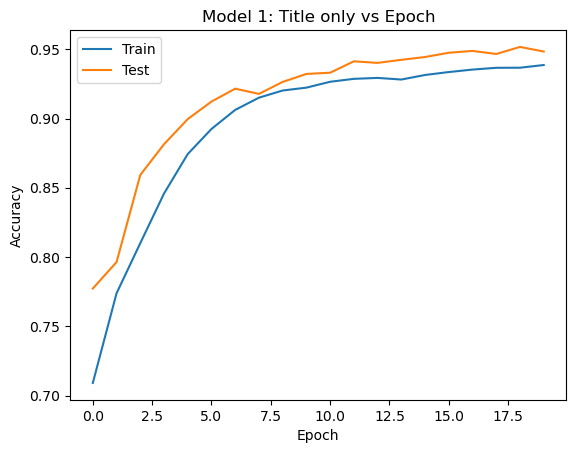

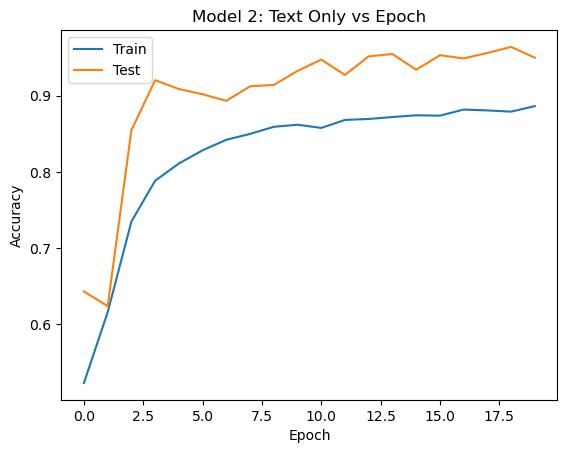

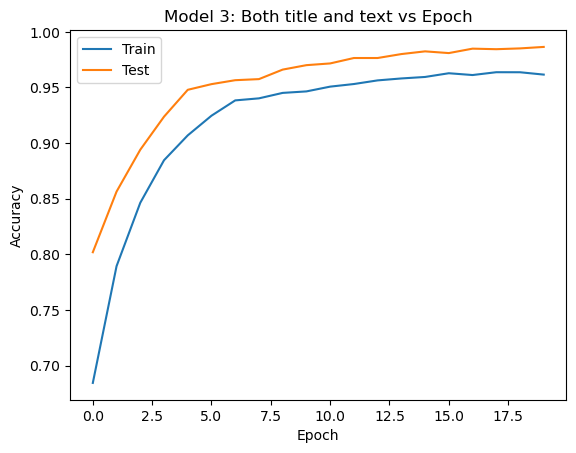

In [12]:
# Plot training histories
def plot_history(model, title):
    """
    Plots the training and validation accuracy of model vs epochs

    Args:
    - model (tf.keras.Model): trained model with the history of training
    - title (str): plot title

    Returns:
    - None: function show plotted graph directly
    """
    #plot the accuracy vs epoch plot for each model
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

#execute the plot functions
plot_history(title_only, 'Model 1: Title only vs Epoch')
plot_history(text_only, 'Model 2: Text Only vs Epoch')
plot_history(text_title, 'Model 3: Both title and text vs Epoch')

## Acquiring data

Read the csv file from the given link 

    train_url = "https://github.com/PhilChodrow/PIC16b/blob/master/datasets/fake_news_train.csv?raw=true"

In [13]:
#importing the new data
test_url = "https://github.com/PhilChodrow/PIC16b/blob/master/datasets/fake_news_test.csv?raw=true"
test_data = pd.read_csv(test_url)

### What Accuracy Should You Aim For?

Your three different models might have noticeably different performance. Your best model should be able to consistently score at least 97% validation accuracy.

After comparing the performance of each model on validation data, make a recommendation regarding the question at the beginning of this section. Should algorithms use the title, the text, or both when seeking to detect fake news?

- Answer: Based on the graphs above, the both title and text model provides the best accuacy for the test data and is able to consistently achieve above 95% in test data after the 5th epoch. Therefore, this model is optimial for detecting fake news compared to the other two models.

## Model Evaluation

Now we’ll test your model performance on unseen test data. For this part, you can focus on your best model, and ignore the other two.

Once you’re satisfied with your best model’s performance on validation data, download the test data here:

    test_url = "https://github.com/PhilChodrow/PIC16b/blob/master/datasets/fake_news_test.csv?raw=true"

In [14]:
#apply preprocessing to title and text datat
test_data['title'] = test_data['title'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)

# Create tf.data.Dataset for test data
test_dataset = make_dataset(test_data).batch(32)

#test the data on the model and print result
test_loss, test_accuracy = model_both.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9750 - loss: 0.0749
Test Loss: 0.0728958249092102
Test Accuracy: 0.9760791063308716


# Grading items:


#### Data Prep
1. Stopwords are removed during the construction of the data set.

2. make_dataset is implemented as a function, and used to create both the training/validation and testing data sets.

3. The constructed Dataset has multiple inputs.

4. Write a function to do train test split. 

5. 20% of the training data is split off for validation.

#### Models
6. Model 1 uses only the article title.

7. Model 2 uses only the article text.

8. Model 3 uses both the article title and text.

9. For model 3, embedding is consistent with the text vectorization method. i.e., if you use shared embedding layer, the preceding text vectorization layer also should be shared.

10. The training history is plotted for each of the three models, including the training and validation performance.

11. The most performant model is evaluated on the test data set.

12. The best model consistently obtains at least 97% accuracy on the validation set.

13. The best model’s performance on the test set is shown.

#### Style and Documentation

14. Throughout the HW, function docstrings, incline comments, and markdown are required. 